# После формирования дата сета, нужно привести наш дата сет в порядок, убрать лишнее

## Библиотеки

In [3]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

## Параметры

In [4]:
# с какой дерриктории будем считывать
DATA_DIR = './../data/static'
# куда сохраним наши данные массива главных точек
DATA_SAVE_RESULT = './../data/data.pickle'
data = []
labels = []

Объекты для обнарущения орентиров

In [5]:
mp_hands = mp.solutions.hands                   # отслеживание рук
mp_drawing = mp.solutions.drawing_utils         # для рисования точек и связей на изображениях
mp_drawing_styles = mp.solutions.drawing_styles # можно использовать при визуализации точек и связей

# static_image_mode=True: Указывает, что отслеживание рук выполняется на статическом изображении, а не на видеопотоке. 
                            # В этом режиме модель предполагает, что входное изображение - это один статический кадр.
# min_detection_confidence=0.3: Задает минимальный уровень уверенности, необходимый для успешного обнаружения руки. 
                            # Более высокий порог уверенности может привести к меньшему количеству, но более надежным обнаружениям.
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

## Отображений данных частично 

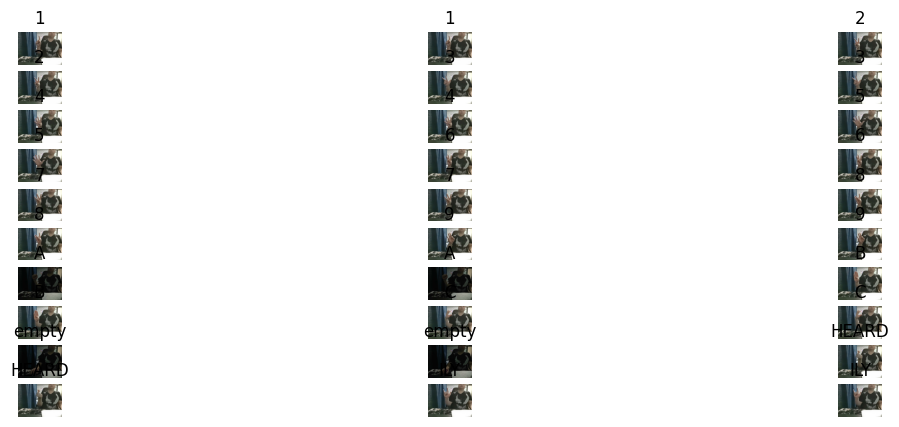

In [6]:
all_images = []
num_columns = 3
count_example = 2

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:count_example]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        all_images.append((img_rgb, dir_))

num_images = len(all_images)
num_rows = (num_images + num_columns - 1) // num_columns
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5))
axs = axs.flatten()
for i, (img, label) in enumerate(all_images):
    axs[i].imshow(img)
    axs[i].set_title(label)
    axs[i].axis('off')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.show()

## Фильтруем дата сет

пример

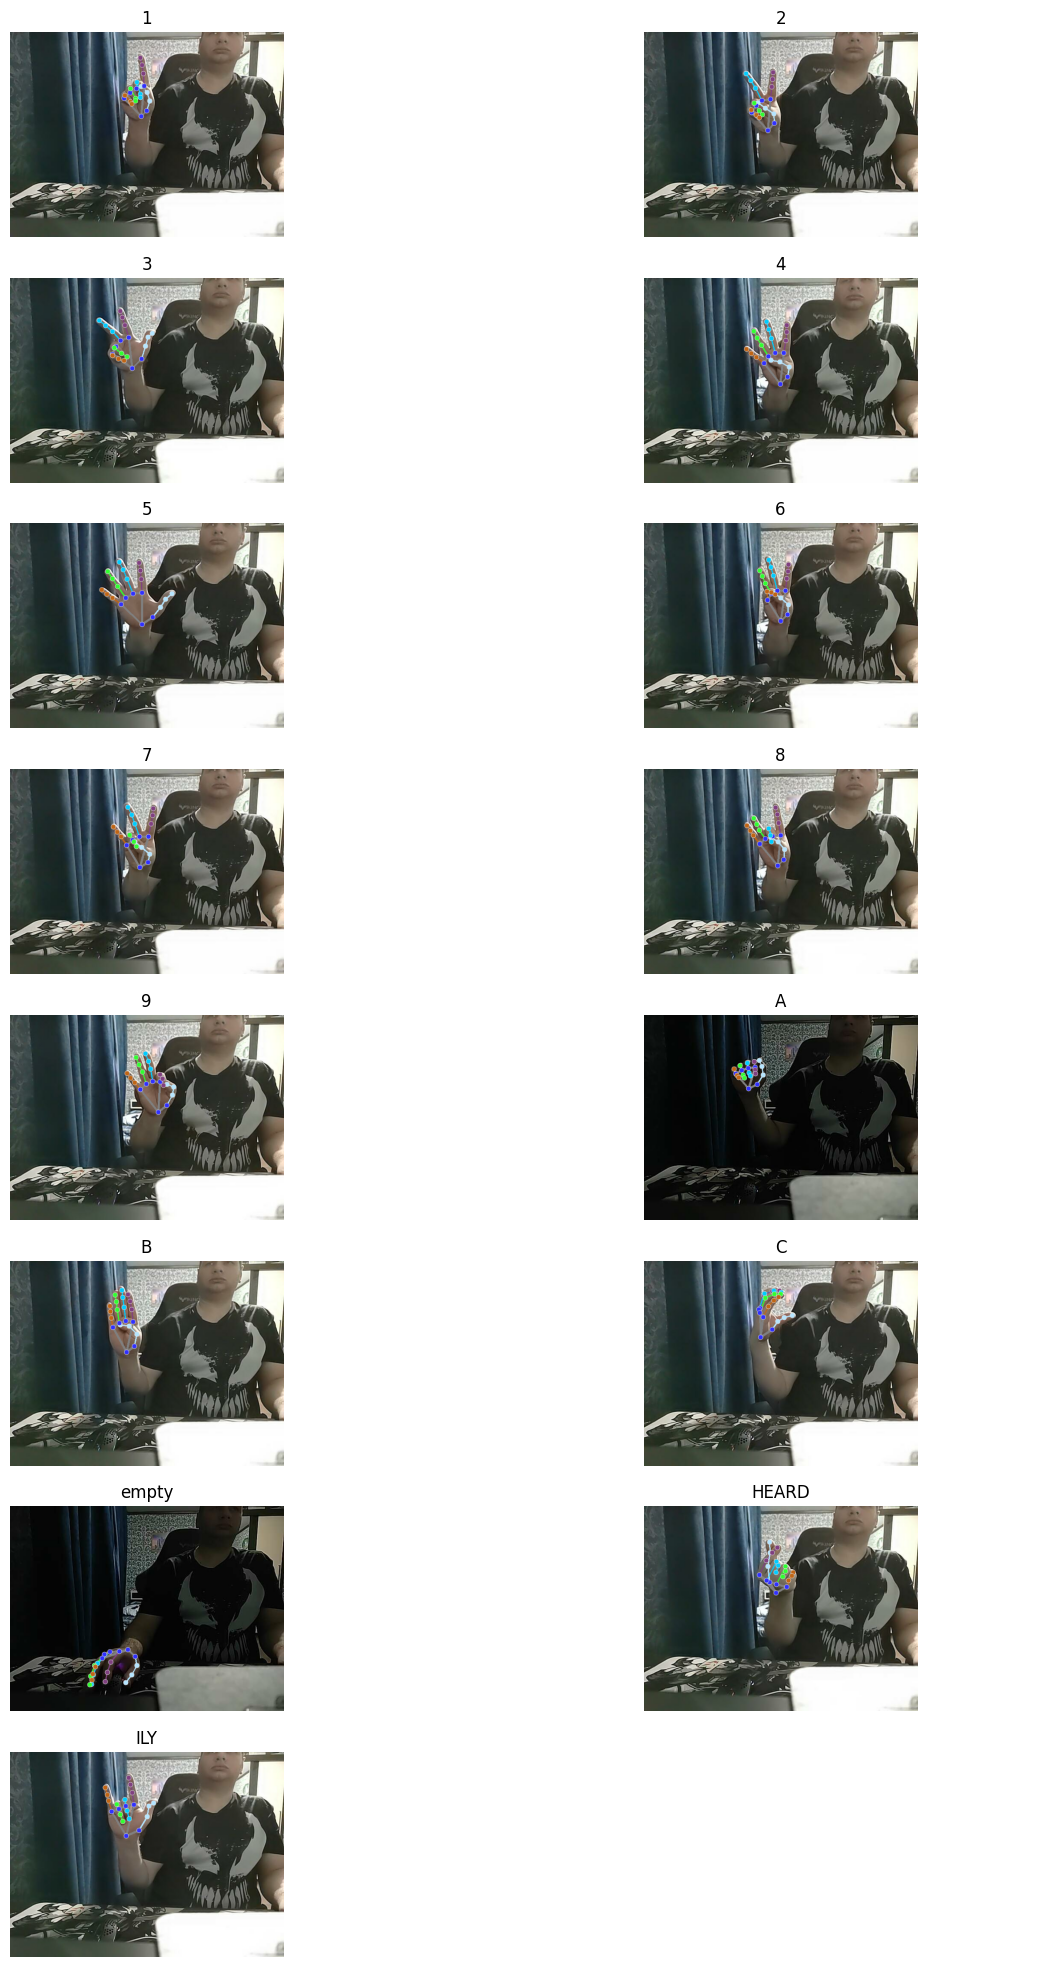

In [7]:
all_images = []
num_columns = 2
count_example = 1

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:count_example]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        
        results = hands.process(img_rgb)
        # обнаружили мы хотябы одну руку
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # рисуем ключевые точки и связи на изображении
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks, # координаты ключевых точек руки
                    mp_hands.HAND_CONNECTIONS, # для отрисовки связей между точками
                    mp_drawing_styles.get_default_hand_landmarks_style(), # возвращает объект, представляющий стиль
                    mp_drawing_styles.get_default_hand_connections_style() # для отрисовки связей между ключевыми точками.
                )
        all_images.append((img_rgb, dir_))

num_images = len(all_images)
num_rows = (num_images + num_columns - 1) // num_columns
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 25))
axs = axs.flatten()
for i, (img, label) in enumerate(all_images):
    axs[i].imshow(img)
    axs[i].set_title(label)
    axs[i].axis('off')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.show()

ну а теперь сохраняем себе все ориентиры

In [10]:
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        x_ = []
        y_ = []
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        # нашли ли руку
        if results.multi_hand_landmarks:
            # проходим по каждой руке на изображении
            for hand_landmarks in results.multi_hand_landmarks:
                # собираем координаты X и Y всех ключевых точек руки
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    x_.append(x)
                    y_.append(y)

                # нормализуем координаты точек относительно минимальных значений
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

сохроняем

In [11]:
f = open(DATA_SAVE_RESULT, 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()